In [143]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LassoCV

In [144]:
df = pd.read_csv('inequality_class_final.csv')
df2=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          205 non-null    object 
 1   federalism_GT                    202 non-null    float64
 2   id                               69 non-null     float64
 3   region_wb                        69 non-null     object 
 4   gdp                              69 non-null     float64
 5   statehiste1500_02n               159 non-null    float64
 6   origtime2                        158 non-null    float64
 7   eleva                            193 non-null    float64
 8   avg_temp                         197 non-null    float64
 9   Maddison_gdppc_1990_estimate_ln  194 non-null    float64
 10  lp_lat_abst_fill                 200 non-null    float64
 11  mountains                        196 non-null    float64
 12  log_ocdistance_new    

 go ahead and drop variables that are not needed - name and region are not quantitative and we dont necessarily want to use each country to map to its respective income inequality


 
Country name, regional dummy, id


may drop gdp bc there are so few entries for it
when gdp is not dropped then there are 52 non null entries
when gdp is dropped then there are 122 entries 

this is a 142% increase in the number of entries.

**I will drop gdp and see how it goes.** 

In [145]:
df = df.drop(columns=['country','region_wb','id','gdp'])
df.head()

,federalism_GT,statehiste1500_02n,origtime2,eleva,avg_temp,Maddison_gdppc_1990_estimate_ln,lp_lat_abst_fill,mountains,log_ocdistance_new,rugged,...,sd_emeanclip,Urbanpopulationoftotalpop,dist2suitable_km_new,Ygini_disp,Fixedtelephonesubscriptionsp,Employmentinagricultureof,Accesstoelectricityofpopu,pln_sxHr_mean,agyears_ext,popd_1500AD
0,2.0,0.311557,15000.0,1076.740352,21.6,9.079312,0.255556,0.455154,2.952231,1.732390,...,0.776437,76.920,191207.98,46.400002,18.318046,13.790000,98.110626,2626.828031,4100.0,12.078997
1,0.0,NaN,NaN,184.250987,26.0,8.904918,0.044444,0.048973,4.338826,0.306818,...,0.133851,66.547,175987.63,45.799999,16.041285,8.460000,94.783394,6696.253076,1500.0,0.057579
2,0.0,0.124440,8000.0,359.346328,3.6,10.248469,0.688889,0.190206,4.567989,0.715470,...,0.248912,84.588,108188.94,25.000000,60.024409,2.250000,100.000000,0.000000,5500.0,0.842480
3,2.0,0.358282,45000.0,1317.581088,7.0,10.436217,0.522222,0.938316,5.708037,4.761175,...,0.625552,73.530,358067.16,29.900000,65.373435,4.000000,100.000000,877.940256,5500.0,19.928775
4,0.0,0.082024,135000.0,208.329245,27.6,7.401412,0.088889,0.016055,4.321187,0.227549,...,0.074167,48.669,351368.59,43.000000,1.639566,53.939999,56.975372,6889.873359,3500.0,7.670432


drop empty cells, check how much data is left

In [146]:
df=df.dropna()
df2=df2.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 204
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   federalism_GT                    122 non-null    float64
 1   statehiste1500_02n               122 non-null    float64
 2   origtime2                        122 non-null    float64
 3   eleva                            122 non-null    float64
 4   avg_temp                         122 non-null    float64
 5   Maddison_gdppc_1990_estimate_ln  122 non-null    float64
 6   lp_lat_abst_fill                 122 non-null    float64
 7   mountains                        122 non-null    float64
 8   log_ocdistance_new               122 non-null    float64
 9   rugged                           122 non-null    float64
 10  tropical                         122 non-null    float64
 11  pmean                            122 non-null    float64
 12  irri_impact5          

In [147]:
vars = ['federalism_GT',
 'statehiste1500_02n',
 'origtime2',
 'eleva',
 'avg_temp',
 'Maddison_gdppc_1990_estimate_ln',
 'lp_lat_abst_fill',
 'mountains',
 'log_ocdistance_new',
 'rugged',
 'tropical',
 'pmean',
 'irri_impact5',
 'frstdays',
 'sd_emeanclip',
 'Urbanpopulationoftotalpop',
 'dist2suitable_km_new',
 'Fixedtelephonesubscriptionsp',
 'Employmentinagricultureof',
 'Accesstoelectricityofpopu',
 'pln_sxHr_mean',
 'agyears_ext',
 'popd_1500AD']




(array([14., 12., 17., 22., 23., 20.,  6.,  4.,  2.,  2.]),
 array([23.5, 27.8, 32.1, 36.4, 40.7, 45. , 49.3, 53.6, 57.9, 62.2, 66.5]),
 <BarContainer object of 10 artists>)

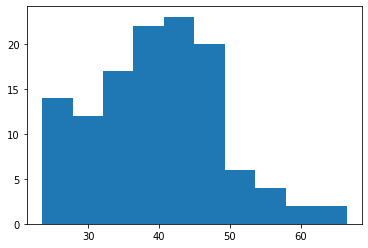

In [148]:

y = df.loc[:, 'Ygini_disp'].values


plt.hist(y) 

y var is somewhat gaussian but still skewed

In [149]:
def numPCA(x,v):
    pca = PCA(.80)
    model = pca.fit(StandardScaler().fit_transform(x[v]))
    n_pcs = pca.n_components_
        
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
    #print(model.components_)
    initial_feature_names = v
    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df2 = pd.DataFrame(dic.items())
    print (n_pcs)
    print (pca.explained_variance_ratio_)
    #print(df2)
    return  df2 , model



Im going to try to group elevation, latitude, tropical, rugged, temperature, agricultural history and precipitation together as they seem to deal with agricultural conditions

In [150]:
pca_vars = ['lp_lat_abst_fill','eleva','avg_temp','pmean','statehiste1500_02n','tropical','rugged']
a,b = numPCA(df,vars)
a

6
[0.35194906 0.1761922  0.1129949  0.07162949 0.06046289 0.05405266]


,0,1
0,PC0,lp_lat_abst_fill
1,PC1,eleva
2,PC2,pmean
3,PC3,statehiste1500_02n
4,PC4,federalism_GT
5,PC5,popd_1500AD


In [151]:
table, model = numPCA(df,pca_vars)
table
#table is buggy 

3
[0.47913547 0.23569816 0.13145866]


,0,1
0,PC0,tropical
1,PC1,eleva
2,PC2,statehiste1500_02n


3 pca variables replace 5 Ivs

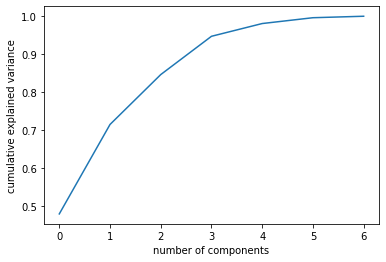

In [152]:
#create a scree plot for pca using df[pca_vars]
pca = PCA().fit(StandardScaler().fit_transform(df[pca_vars]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
#2\3 components explain 90% of the variance but i think the graph is wrong as in 2 =3 and 3=4 on the number of components

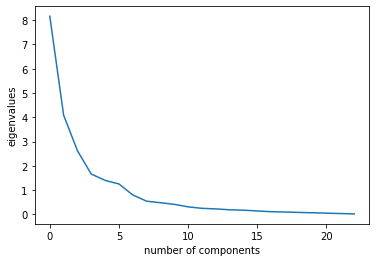

In [153]:
pca = PCA().fit(StandardScaler().fit_transform(df[vars]))
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('eigenvalues');

5 components follow Kaiser rule (pick PCs with eigenvalues of at least 1)

Based on this, [0.47913547 0.23569816 0.13145866 0.10089219 0.03359855 0.01533732
 0.00387965]


**I decided to use the first three components to explain the 7 variables related to argiculture / landscape**

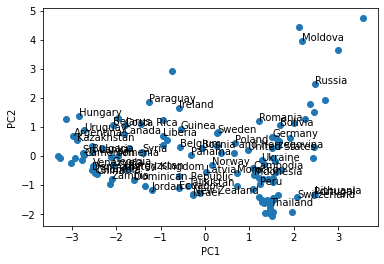

In [154]:
#pca biplot for df[pca_vars]
pca = PCA().fit(StandardScaler().fit_transform(df[pca_vars]))
pca_data = pca.transform(StandardScaler().fit_transform(df[pca_vars]))
xs = pca_data[:,0]
ys = pca_data[:,1]

plt.scatter(xs,ys)
plt.xlabel("PC1")
plt.ylabel("PC2")

for i, txt in enumerate(df2['country']):
    plt.annotate(txt, (xs[i], ys[i]))
    
plt.show()

I was just curious about how this would look

**moving on from PCA**

In [155]:
#define new variables after pca


#remove pca_vars from vars
for i in pca_vars:
    vars.remove(i)


vars.append(['PC0'])
vars.append(['PC1'])
vars.append(['PC2'])


pca2 = PCA(n_components=3)

# create 1 dimensional representation
latent_vars = pca2.fit(StandardScaler().fit_transform(df[pca_vars]))
print ("Variance explained by each latent variable in PCA: ", pca2.explained_variance_ratio_)
df['PC0'] = latent_vars.transform(StandardScaler().fit_transform(df[pca_vars]))[:,0]
df['PC1'] = latent_vars.transform(StandardScaler().fit_transform(df[pca_vars]))[:,1]
df['PC2'] = latent_vars.transform(StandardScaler().fit_transform(df[pca_vars]))[:,2]

Variance explained by each latent variable in PCA:  [0.47913547 0.23569816 0.13145866]


In [156]:
#train test split
dfx = df[['federalism_GT',
 'origtime2',
 'Maddison_gdppc_1990_estimate_ln',
 'lp_lat_abst_fill',
 'mountains',
 'log_ocdistance_new',
 'irri_impact5',
 'frstdays',
 'sd_emeanclip',
 'Urbanpopulationoftotalpop',
 'dist2suitable_km_new',
 'Fixedtelephonesubscriptionsp',
 'Employmentinagricultureof',
 'Accesstoelectricityofpopu',
 'pln_sxHr_mean',
 'agyears_ext',
 'popd_1500AD','PC0','PC1','PC2']]

# i tried using vars to get columns from df but it didnt work
x_train, x_test, y_train, y_test = train_test_split(dfx, y, test_size=0.25, random_state=42)


# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)



(91, 20) (91,)
(31, 20) (31,)


In [157]:
def lin (x_train, x_test, y_train, y_test,df,df2,vars):
    # try both linear and polynomial of different degrees
    linear_model = LinearRegression(normalize=True)
    lin_1 = linear_model.fit(x_train, y_train)
    lin1_predict = lin_1.predict(x_test)
    print('cross val for test set')
    lin_score=np.mean(cross_val_score(linear_model, df,df2, cv=3))
    print("lin score", lin_score)
    print('MSE for test set')
    print('MSE: lin ', mean_squared_error(lin1_predict, y_test))
    
    coefs = lin_1.coef_[lin_1.coef_ > .0000001]
    equation_dict = {}
    print(f'Equation:')
    for i in range(len(coefs[:-1])):
        print(f'{round(coefs[i], 2)}{vars[i]}', end=' + ')
        equation_dict[coefs[i]] = vars[i]
    print(f'{round(coefs[-1], 2)}{vars[-1]}')
    equation_dict[coefs[-1]] = vars[-1]
   
        
 #lin(x_wrte_train, x_wrte_test, y_wrte_train, y_wrte_test,x_wrte,y_wrte,wrte) 
     
lin(x_train, x_test, y_train, y_test,dfx,y,vars)       


cross val for test set
lin score 0.5192413579194438
MSE for test set
MSE: lin  37.5443629013814
Equation:
1.36federalism_GT + 0.66origtime2 + 3.51Maddison_gdppc_1990_estimate_ln + 2.05mountains + 0.01log_ocdistance_new + 0.0irri_impact5 + 5.94['PC2']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

In [158]:
#code lasso regression for xtrain y train / test
lasso_model = LassoCV(alphas = np.logspace(-4, 4, 100), cv=3, normalize=True)
lasso_model.fit(x_train, y_train)
lasso_predict = lasso_model.predict(x_test)
print('cross val for test set')
lasso_score=np.mean(cross_val_score(lasso_model, x_train,y_train, cv=3))
print("lasso score", lasso_score)
print('MSE for test set')
print('MSE: lasso ', mean_squared_error(lasso_predict, y_test))
print('R squared for test set')
print('R squared: lasso ', r2_score(lasso_predict, y_test))
print('Lasso alpha: ', lasso_model.alpha_)
print('Lasso coefficients: ', lasso_model.coef_)

cross val for test set
lasso score 0.5040605673651282
MSE for test set
MSE: lasso  39.2606700623096
R squared for test set
R squared: lasso  -0.2867100469134167
Lasso alpha:  0.08111308307896872
Lasso coefficients:  [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -5.55728952e+00
  0.00000000e+00 -0.00000000e+00  2.11671048e-01 -1.57807792e-01
  1.46898441e+00 -0.00000000e+00  0.00000000e+00 -9.22342704e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.29136159e-04
 -4.57493275e-02 -0.00000000e+00  5.52382196e-01 -0.00000000e+00]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Stand